# PHYS 3116 SAMI

## Introduction
In this assignemnt, I will explore "The Faber-Jackson Relation in the SAMI Galaxy Survey".

In [1]:
# import libraries
from math import log10, floor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colours
from astropy.io import ascii, fits
from astropy.table import Table, join
from scipy.odr import *

Data of SAMI survey have been obtained from moodle, including
- InputCatGAMADR3.csv
- samiDR3InputCatClusters.csv
- samiDR3StelKin.csv 
- samiDR3VisualMorphology.csv 

In [2]:
# read in all data files.
gama = pd.read_csv('InputCatGAMADR3.csv')
clusters = pd.read_csv('samiDR3InputCatClusters.csv')
kinematics = pd.read_csv('samiDR3StelKin.csv')
morphology = pd.read_csv('samiDR3VisualMorphology.csv')

In [3]:
#Have a look at gama.
gama

,Unnamed: 0,catid,ra_obj,dec_obj,ra_ifu,dec_ifu,r_petro,r_auto,z_tonry,z_spec,...,mu_within_1re,mu_1re,mu_2re,ellip,pa,mstar,g_i,a_g,surv_sami,bad_class
0,0,40873,183.439765,-0.833229,183.439765,-0.833229,19.491,16.869,0.05234,0.05110,...,NaN,NaN,NaN,NaN,NaN,9.81,0.76,0.082,3,3
1,1,48805,218.621562,-0.798935,218.621562,-0.798935,19.507,17.607,0.03735,0.03654,...,NaN,NaN,NaN,NaN,NaN,8.92,0.39,0.149,3,3
2,2,196977,133.590423,-0.707572,133.590423,-0.707572,17.149,17.130,0.05055,0.04949,...,NaN,NaN,NaN,NaN,NaN,9.96,1.13,0.092,3,0
3,3,215293,133.536926,0.498455,133.536926,0.498455,19.755,15.062,0.02944,0.02842,...,NaN,NaN,NaN,NaN,NaN,10.10,0.84,0.184,8,3
4,4,323508,132.033380,1.564864,132.033380,1.564864,19.154,18.930,0.04058,0.03956,...,NaN,NaN,NaN,NaN,NaN,8.70,0.63,0.134,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,5531,3904357,134.140799,-0.982177,134.140799,-0.982177,16.969,16.961,0.07792,0.07683,...,NaN,NaN,NaN,NaN,NaN,10.49,1.26,0.118,3,0
5532,5532,3904638,134.336441,-0.975246,134.336441,-0.975246,14.814,14.664,0.04027,0.03921,...,NaN,NaN,NaN,NaN,NaN,10.62,0.95,0.133,8,0
5533,5533,3904639,134.334701,-0.976230,134.334701,-0.976230,17.545,14.669,0.04011,0.03905,...,NaN,NaN,NaN,NaN,NaN,10.61,0.95,0.133,8,3
5534,5534,3913888,138.160900,-0.869614,138.160900,-0.869614,17.292,17.276,0.08248,0.08133,...,NaN,NaN,NaN,NaN,NaN,10.32,1.15,0.142,3,0


In [4]:
#Have a look at clusters.
clusters

,Unnamed: 0,catid,ra_obj,dec_obj,r_petro,r_auto,z_spec,m_r,r_e,mu_within_1re,...,mu_2re,ellip,pa,g_i,mstar,r_on_rtwo,v_on_sigma,is_mem,surv_sami,bad_class
0,0,9011900001,14.067154,-1.255369,12.986222,13.169163,0.044521,-23.331750,63.775894,22.915201,...,25.986717,0.208539,217.454990,1.319817,11.587700,0.000007,0.111102,1,7,0
1,1,9011900002,14.074034,-1.260330,16.286343,16.306042,0.039119,-20.190361,1.387755,19.107248,...,21.818083,0.072154,275.846130,1.120206,10.157130,0.013052,-1.740296,1,7,8
2,2,9011900003,14.074577,-1.262134,15.871767,16.268087,0.038497,-20.227768,NaN,NaN,...,NaN,NaN,NaN,1.149833,10.205531,0.015453,-1.954193,1,7,0
3,3,9011900005,14.053785,-1.263290,18.609417,17.308725,0.037783,-19.185982,NaN,NaN,...,NaN,NaN,NaN,1.262867,9.887663,0.023897,-2.199696,1,7,0
4,4,9011900006,14.075615,-1.241840,15.212702,15.001332,0.043613,-21.498928,2.605901,19.021425,...,21.946754,0.052938,169.881260,1.299364,10.841409,0.024553,-0.199599,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1428,9403802507,355.462006,-28.024633,13.807933,13.814304,0.027995,-21.755268,10.403782,20.402050,...,22.924469,0.391180,153.421450,1.173484,10.861442,1.898294,-0.661061,1,2,0
1429,1429,9403802643,358.042481,-29.079000,13.255436,13.179537,0.028929,-22.390470,7.967797,19.484213,...,22.402075,0.117927,-22.480463,1.205694,11.135397,1.959601,-0.205427,1,2,0
1430,1430,9403802645,358.100830,-29.022968,13.826105,13.786763,0.028978,-21.782967,5.957755,19.298214,...,22.319448,0.178894,89.682280,1.240391,10.923486,1.959881,-0.181492,1,2,0
1431,1431,9403802684,358.025421,-29.114414,15.715639,15.720633,0.028949,-19.850200,7.187348,21.040422,...,23.554182,0.602508,136.687180,1.053694,9.989643,1.980252,-0.195256,1,2,0


In [5]:
#Have a look at kinematics.
kinematics

,Unnamed: 0,cubeid,cubeidpub,cubename,catid,pa_stelkin,pa_stelkin_err,sigma_re,sigma_re_err,sigma_3kpc_round,...,lambdar_re_mge,lambdar_re_mge_err,lambdar_max_mge,lambdar_max_mge_err,vsigma_re_mge,vsigma_re_mge_err,vsigma_max_mge,vsigma_max_mge_err,mean_k51_re_mge,mean_k51_re_mge_err
0,0,6821_blue_red_7_Y18SAR4_P001_12T126_2018_05_07...,6821_A,6821_blue_7_Y18SAR4_P001_12T126_2018_05_07-201...,6821,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6837_blue_red_7_Y18SAR4_P001_12T126_2018_05_07...,6837_A,6837_blue_7_Y18SAR4_P001_12T126_2018_05_07-201...,6837,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7139_blue_red_7_Y18SAR3_P002_12T122_2018_05_07...,7139_A,7139_blue_7_Y18SAR3_P002_12T122_2018_05_07-201...,7139,267.5,1.500000,235.612810,3.014763,232.860760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7206_blue_red_7_Y18SAR3_P002_12T122_2018_05_07...,7206_A,7206_blue_7_Y18SAR3_P002_12T122_2018_05_07-201...,7206,277.0,1.416667,106.101770,2.071345,96.782265,...,0.539752,0.014970,NaN,NaN,0.675744,0.023066,NaN,NaN,0.034964,0.008393
4,4,7289_blue_red_7_Y18SAR3_P002_12T122_2018_05_07...,7289_A,7289_blue_7_Y18SAR3_P002_12T122_2018_05_07-201...,7289,84.5,12.750000,205.145280,1.877292,228.245320,...,0.055964,0.006931,NaN,NaN,0.061528,0.006164,NaN,NaN,0.239753,0.072991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,3421,9403801268_blue_red_7_Y16SBR2_P001_A4038T032_2...,9403801268_A,9403801268_blue_7_Y16SBR2_P001_A4038T032_2016_...,9403801268,175.5,0.666667,NaN,NaN,111.939476,...,0.661763,0.006002,0.583241,0.006002,0.978951,0.010417,0.814796,0.010417,NaN,NaN
3422,3422,9403801272_blue_red_7_Y13SBR2_P006_A4038T004_2...,9403801272_A,9403801272_blue_7_Y13SBR2_P006_A4038T004_2013_...,9403801272,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3423,3423,9403801281_blue_red_7_Y16SBR2_P001_A4038T032_2...,9403801281_A,9403801281_blue_7_Y16SBR2_P001_A4038T032_2016_...,9403801281,64.0,2.166667,57.441160,1.779504,49.261673,...,0.511139,0.020564,0.423043,0.020564,0.670081,0.028423,0.540399,0.028423,0.043480,0.010706
3424,3424,9403801368_blue_red_7_Y13SBR2_P006_A4038T004_2...,9403801368_A,9403801368_blue_7_Y13SBR2_P006_A4038T004_2013_...,9403801368,66.0,3.416667,NaN,NaN,285.333070,...,0.070171,0.002102,0.055665,0.002102,0.070703,0.001820,0.057503,0.001820,NaN,NaN


In [6]:
# Have a look at morphology.
morphology

,Unnamed: 0,catid,type
0,0,6821,3.0
1,1,6837,3.0
2,2,7139,1.0
3,3,7206,2.0
4,4,7289,0.5
...,...,...,...
3063,3063,9403801268,1.5
3064,3064,9403801272,2.5
3065,3065,9403801281,1.5
3066,3066,9403801368,0.0


## Data select
The Faber-Jackson Ralation describes the first empirical power-law relation between luminosity(or mass) and velocity dispersion among early-type(elliptical) galaxies. Thus, we need firstly identify galaxies of types from E0 to S0.

Morphological Type are classified like so: 
0=E; 0.5=E/S0; 1=S0; 1.5=S0/Early-spiral; 2=Early-spiral; 2.5=Early/Late spiral; 3=Late spiral; 5=?; -9=no agreement.

Text(0.5, 1.0, 'Galaxy Types Histogram for SAMI')

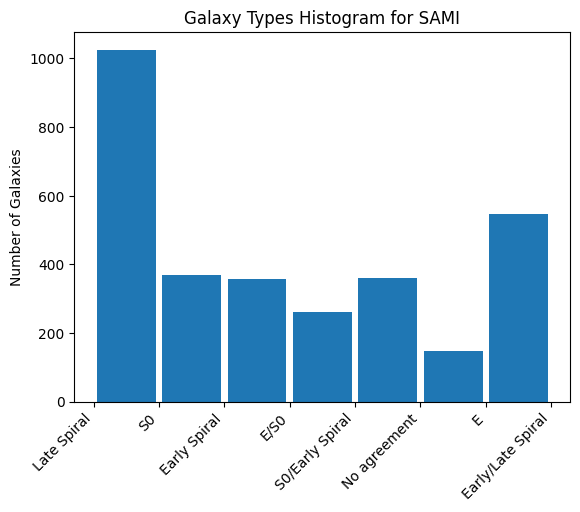

In [7]:
#Find the distribution of galaxy types provided by SAMI
def type_to_name(morphology_type):
    if morphology_type == 0:
        return 'E'
    elif morphology_type == 0.5:
        return 'E/S0'
    elif morphology_type == 1:
        return 'S0'
    elif morphology_type == 1.5:
        return 'S0/Early Spiral'
    elif morphology_type == 2:
        return 'Early Spiral'
    elif morphology_type == 2.5:
        return 'Early/Late Spiral'
    elif morphology_type == 3:
        return 'Late Spiral'
    else:
        return 'No agreement'

morphology['type_name'] = morphology['type'].apply(type_to_name)
plt.hist(morphology['type_name'], rwidth=0.9, bins=7)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Galaxies')
plt.title('Galaxy Types Histogram for SAMI')

In [19]:
# lets combine morph and gamma so we can get all the details we need into a single dataframe
gama_morphology = pd.merge(gama, morphology, on='catid')

In [20]:
# lets combine again because I can not do it in once.
gama_kinematic_morphology=pd.merge(gama_morphology, kinematics, on='catid')


In [21]:
# Have a look the ultimate gamma arrey. 
gama_kinematic_morphology

,Unnamed: 0_x,catid,ra_obj,dec_obj,ra_ifu,dec_ifu,r_petro,r_auto,z_tonry,z_spec,...,lambdar_re_mge,lambdar_re_mge_err,lambdar_max_mge,lambdar_max_mge_err,vsigma_re_mge,vsigma_re_mge_err,vsigma_max_mge,vsigma_max_mge_err,mean_k51_re_mge,mean_k51_re_mge_err
0,5,387080,135.172274,2.245778,135.172274,2.245778,16.401,16.400,0.05343,0.05236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,760733,183.976149,0.085682,183.976149,0.085682,19.867,18.410,0.04171,0.04049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,177326,176.330254,-1.872292,176.330254,-1.872292,19.612,19.185,0.02822,0.02696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,491956,214.065071,-1.464626,214.065071,-1.464626,16.893,16.301,0.03722,0.03634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,619553,220.386541,0.324029,220.386541,0.324029,18.686,18.691,0.02976,0.02900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,5518,3895503,129.493172,-0.942386,129.493172,-0.942386,16.696,16.688,0.05878,0.05777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,5520,3895823,129.661939,-0.853331,129.661939,-0.853331,16.501,16.533,0.05196,0.05095,...,0.593846,0.015305,NaN,NaN,0.801712,0.028035,NaN,NaN,0.027510,0.007810
2389,5523,3896912,130.266687,-0.901206,130.266687,-0.901206,16.575,16.594,0.03084,0.02984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,5524,3897281,130.388354,-0.828282,130.388354,-0.828282,16.927,16.909,0.05790,0.05688,...,0.164042,0.013303,NaN,NaN,0.184165,0.012816,NaN,NaN,0.056647,0.025253


We now looking at galaxy types E0 to S0, to narrow down galaxies that are strickly elliptical.

In [24]:
gama_selected=gama_kinematic_morphology[(gama_kinematic_morphology['type'] >= 0) 
                                        & (gama_kinematic_morphology['type'] <= 1)]

In [25]:
#the array we will be working at.
gama_selected

,Unnamed: 0_x,catid,ra_obj,dec_obj,ra_ifu,dec_ifu,r_petro,r_auto,z_tonry,z_spec,...,lambdar_re_mge,lambdar_re_mge_err,lambdar_max_mge,lambdar_max_mge_err,vsigma_re_mge,vsigma_re_mge_err,vsigma_max_mge,vsigma_max_mge_err,mean_k51_re_mge,mean_k51_re_mge_err
414,841,239292,217.199931,1.692926,217.199931,1.692926,16.825,16.837,0.04906,0.04823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,841,239292,217.199931,1.692926,217.199931,1.692926,16.825,16.837,0.04906,0.04823,...,0.350171,0.014499,NaN,NaN,0.418164,0.017899,NaN,NaN,0.040489,0.012695
856,1669,84106,175.986760,0.522274,175.986760,0.522274,16.164,16.229,0.02918,0.02794,...,0.311339,0.005629,NaN,NaN,0.338269,0.005760,NaN,NaN,0.040789,0.006697
1002,1956,16926,220.942658,0.717896,220.942658,0.717896,16.395,16.406,0.05113,0.05036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,1956,16926,220.942658,0.717896,220.942658,0.717896,16.395,16.406,0.05113,0.05036,...,0.338537,0.008943,NaN,NaN,0.382077,0.010198,NaN,NaN,0.022964,0.009233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,5394,91689,212.977551,0.497814,212.977551,0.497814,16.894,16.789,0.05526,0.05435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2366,5416,371882,133.221560,1.033012,133.221560,1.033012,16.780,16.543,0.05255,0.05150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2376,5498,3628218,135.255508,-0.928607,135.255508,-0.928607,15.874,15.865,0.09017,0.08905,...,0.223822,0.007908,NaN,NaN,0.235178,0.007974,NaN,NaN,0.059404,0.015921
2384,5512,3634556,139.446779,-0.985894,139.446779,-0.985894,15.616,15.559,0.07091,0.06976,...,0.223104,0.009021,NaN,NaN,0.227025,0.008182,NaN,NaN,0.065584,0.015718


## Plot and Linear fit

### Plot

Text(0, 0.5, '$logM_*$ $[M_\\odot]$')

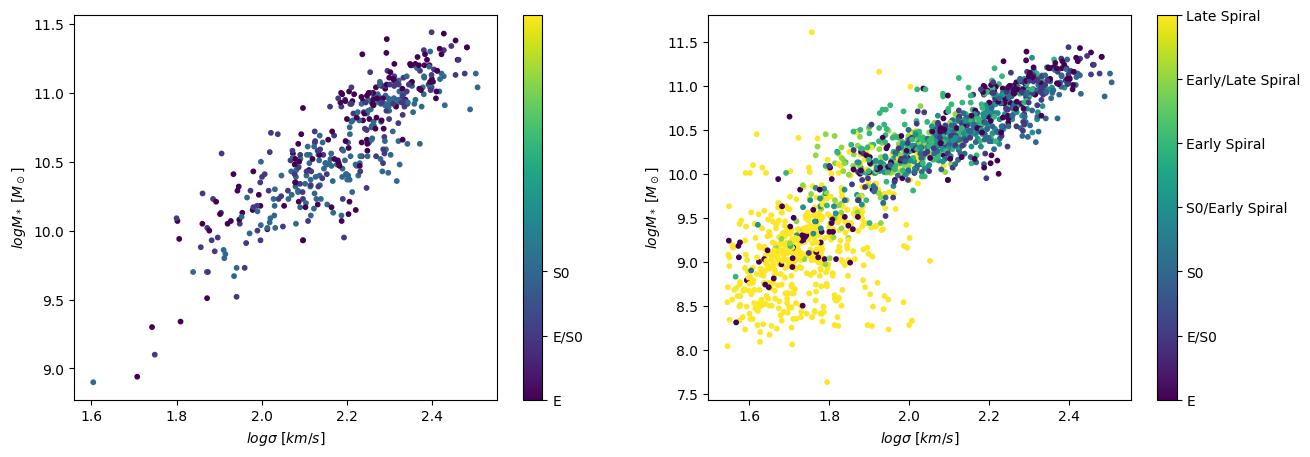

In [60]:
#filtered and unfiltered data

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

gama_mstar = gama_selected["mstar"]
gama_type = gama_selected["type"]
gama_velocity_dispersion = gama_selected["sigma_re"]

sc=axes[0].scatter(np.log10(gama_velocity_dispersion),gama_mstar, c= gama_type,vmin = 0, vmax = 3, s=10)

unique_types = np.unique(gama_type)
cbar = plt.colorbar(sc, ticks=unique_types)
cbar.ax.set_yticklabels([type_to_name(m) for m in unique_types])

axes[0].set_xlabel('$log\\sigma$ $[km/s]$')
axes[0].set_ylabel('$logM_*$ $[M_\\odot]$')


sc=axes[1].scatter(np.log10(gama_kinematic_morphology["sigma_re"]),gama_kinematic_morphology["mstar"], c= gama_kinematic_morphology["type"],vmin = 0, vmax = 3, s=10)

unique_types = np.unique(gama_kinematic_morphology["type"])
cbar = plt.colorbar(sc, ticks=unique_types)
cbar.ax.set_yticklabels([type_to_name(m) for m in unique_types])

axes[1].set_xlabel('$log\\sigma$ $[km/s]$')
axes[1].set_ylabel('$logM_*$ $[M_\\odot]$')

### Linear fit

In [27]:
# Eliminate nan
gama_velocity_dispersion_no_nan = gama_velocity_dispersion[~np.isnan(gama_velocity_dispersion)] # to delete corresponding rows

gama_mstar_no_nan = gama_mstar[~np.isnan(gama_velocity_dispersion)] # to delete corresponding rows

In [28]:
# define a general linear function
def linear(parameters, x):
    m, c = parameters
    return m*x+c

In [72]:
# Fitting the linear curve to the data
model = Model(linear) # making the defined function into a model
# takes the real data and fits it to the model with an initial guess for the parameters
gama_odr = ODR(RealData(np.log10(gama_velocity_dispersion_no_nan), gama_mstar_no_nan),
                 model, beta0=[2,7])
gama_output = gama_odr.run()
gama_output.pprint()

Beta: [3.0522946  3.93379566]
Beta Std Error: [0.08320048 0.18272363]
Beta Covariance: [[ 1.23939605 -2.71626365]
 [-2.71626365  5.97788966]]
Residual Variance: 0.0055852357782432615
Inverse Condition #: 0.02061377484922352
Reason(s) for Halting:
  Sum of squares convergence


Text(0, 0.5, '$logM_*$ $[M_\\odot]$')

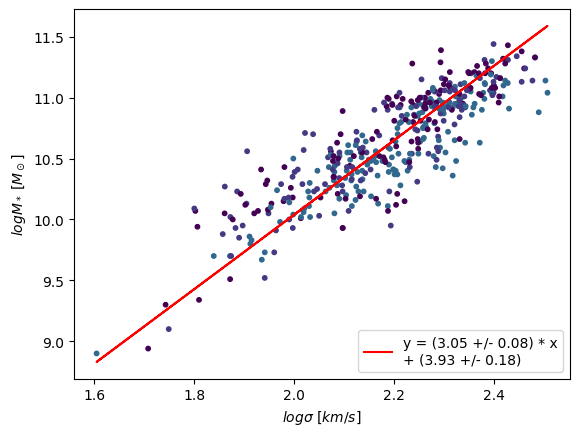

In [75]:
gama_mstar = gama_selected["mstar"]
gama_type = gama_selected["type"]
gama_velocity_dispersion = gama_selected["sigma_re"]

gama_velocity_dispersion_no_nan = gama_velocity_dispersion[~np.isnan(gama_velocity_dispersion)] # to delete corresponding rows

# log of stellar mass
gama_mstar_no_nan = gama_mstar[~np.isnan(gama_velocity_dispersion)] # to delete corresponding rows

sc=plt.scatter(np.log10(gama_velocity_dispersion),gama_mstar, c= gama_type,vmin = 0, vmax = 3, s=10)

unique_types = np.unique(gama_type)

plt.plot(np.log10(gama_velocity_dispersion_no_nan), linear(gama_output.beta, np.log10(gama_velocity_dispersion_no_nan)),
         color='red', label = "y = ({:.2f} +/- {:.2f}) * x\n+ ({:.2f} +/- {:.2f})"
         .format(gama_output.beta[0], gama_output.sd_beta[0],gama_output.beta[1], gama_output.sd_beta[1]))

plt.xlabel('$log\\sigma$ $[km/s]$') # x-axis label
plt.ylabel('$logM_*$ $[M_\\odot]$') # y-axis label
plt.legend(loc='lower right') # show legend

plt.xlabel('$log\\sigma$ $[km/s]$')
plt.ylabel('$logM_*$ $[M_\\odot]$')

## Clusters

### Similarly, let's do the same with clusters data.
(Nothing but copy and paste and change variables.)

In [49]:
#copy and paste

clusters_morphology = pd.merge(clusters, morphology, on='catid')

clusters_kinematic_morphology=pd.merge(clusters_morphology, kinematics, on='catid')

clusters_selected=clusters_kinematic_morphology[(clusters_kinematic_morphology['type'] >= 0) 
                                        & (clusters_kinematic_morphology['type'] <= 1)]

In [50]:
# Just check.
clusters_selected

,Unnamed: 0_x,catid,ra_obj,dec_obj,r_petro,r_auto,z_spec,m_r,r_e,mu_within_1re,...,lambdar_re_mge,lambdar_re_mge_err,lambdar_max_mge,lambdar_max_mge_err,vsigma_re_mge,vsigma_re_mge_err,vsigma_max_mge,vsigma_max_mge_err,mean_k51_re_mge,mean_k51_re_mge_err
0,0,9011900001,14.067154,-1.255369,12.986222,13.169163,0.044521,-23.331750,63.775894,22.915201,...,0.110049,0.002989,0.049738,0.002989,0.112003,0.002683,0.055052,0.002683,NaN,NaN
1,1,9011900002,14.074034,-1.260330,16.286343,16.306042,0.039119,-20.190361,1.387755,19.107248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,9011900005,14.053785,-1.263290,18.609417,17.308725,0.037783,-19.185982,NaN,NaN,...,0.300250,0.041936,0.282946,0.041936,0.365776,0.047086,0.345280,0.047086,0.155284,0.035837
5,4,9011900006,14.075615,-1.241840,15.212702,15.001332,0.043613,-21.498928,2.605901,19.021425,...,0.194743,0.004082,NaN,NaN,0.196737,0.003779,NaN,NaN,0.028498,0.008636
6,7,9011900009,14.053487,-1.269424,15.902063,15.652073,0.045034,-20.849602,2.554731,19.301964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,1359,9403801002,356.130188,-28.109283,15.122722,15.129084,0.026791,-20.439213,4.399992,19.834057,...,0.221118,0.004812,NaN,NaN,0.223208,0.004470,NaN,NaN,0.036366,0.007550
951,1360,9403801010,357.647095,-27.793837,14.494032,14.402058,0.029613,-21.168560,4.568189,18.963009,...,0.330702,0.003377,NaN,NaN,0.363301,0.003522,NaN,NaN,0.021464,0.004243
953,1363,9403801062,356.092957,-28.195436,17.061218,16.445768,0.027462,-19.123425,7.931586,22.565273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,1385,9403801368,357.903015,-28.364969,12.621640,12.590560,0.027466,-22.976963,16.196554,20.360712,...,0.070171,0.002102,0.055665,0.002102,0.070703,0.001820,0.057503,0.001820,NaN,NaN


Text(0, 0.5, '$logM_*$ $[M_\\odot]$')

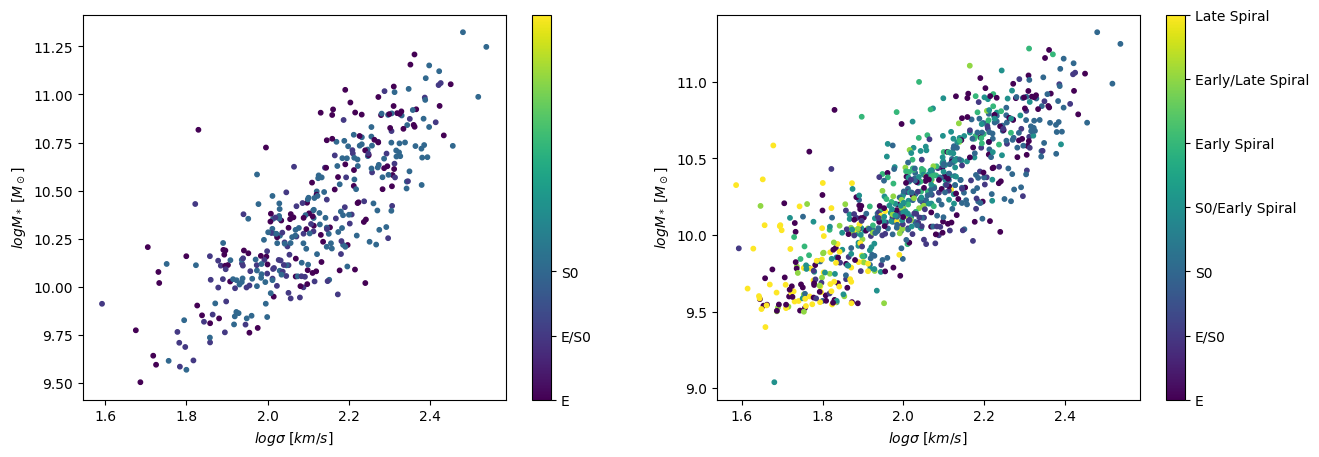

In [76]:
#filtered and unfiltered data

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

clusters_mstar = clusters_selected["mstar"]
clusters_type = clusters_selected["type"]
clusters_velocity_dispersion = clusters_selected["sigma_re"]

sc=axes[0].scatter(np.log10(clusters_velocity_dispersion),clusters_mstar, c= clusters_type,vmin = 0, vmax = 3, s=10)

unique_types = np.unique(clusters_type)
cbar = plt.colorbar(sc, ticks=unique_types)
cbar.ax.set_yticklabels([type_to_name(m) for m in unique_types])

axes[0].set_xlabel('$log\\sigma$ $[km/s]$')
axes[0].set_ylabel('$logM_*$ $[M_\\odot]$')


sc=axes[1].scatter(np.log10(clusters_kinematic_morphology["sigma_re"]),clusters_kinematic_morphology["mstar"], c= clusters_kinematic_morphology["type"],vmin = 0, vmax = 3, s=10)

unique_types = np.unique(clusters_kinematic_morphology["type"])
cbar = plt.colorbar(sc, ticks=unique_types)
cbar.ax.set_yticklabels([type_to_name(m) for m in unique_types])

axes[1].set_xlabel('$log\\sigma$ $[km/s]$')
axes[1].set_ylabel('$logM_*$ $[M_\\odot]$')

Clusters clearly have less concentrate stellar mass, lower velocity dispersion, and more early-type galaxies.

Beta: [2.37478513 5.34933371]
Beta Std Error: [0.08366841 0.17748108]
Beta Covariance: [[ 0.80118352 -1.6952357 ]
 [-1.6952357   3.60506506]]
Residual Variance: 0.008737577373361541
Inverse Condition #: 0.023218489448775678
Reason(s) for Halting:
  Sum of squares convergence


Text(0, 0.5, '$logM_*$ $[M_\\odot]$')

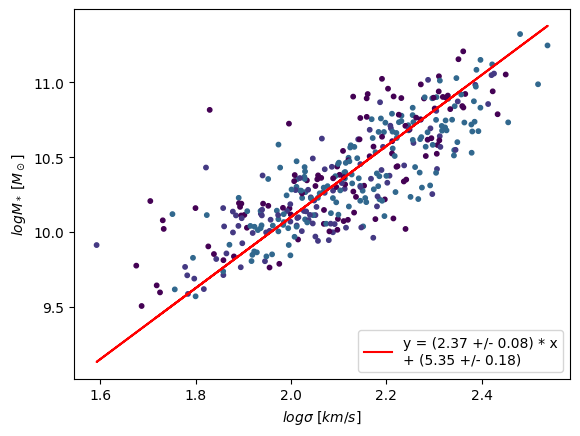

In [77]:
# Eliminate nan
clusters_velocity_dispersion_no_nan = clusters_velocity_dispersion[~np.isnan(clusters_velocity_dispersion)] # to delete corresponding rows

clusters_mstar_no_nan = clusters_mstar[~np.isnan(clusters_velocity_dispersion)] # to delete corresponding rows


# define a general linear function
def linear(parameters, x):
    m, c = parameters
    return m*x+c


# Fitting the linear curve to the data
model = Model(linear) # making the defined function into a model
# takes the real data and fits it to the model with an initial guess for the parameters
clusters_odr = ODR(RealData(np.log10(clusters_velocity_dispersion_no_nan), clusters_mstar_no_nan),
                 model, beta0=[2,7])
clusters_output = clusters_odr.run()
clusters_output.pprint()


clusters_mstar = clusters_selected["mstar"]
clusters_type = clusters_selected["type"]
clusters_velocity_dispersion = clusters_selected["sigma_re"]

clusters_velocity_dispersion_no_nan = clusters_velocity_dispersion[~np.isnan(clusters_velocity_dispersion)] # to delete corresponding rows

# log of stellar mass
clusters_mstar_no_nan = clusters_mstar[~np.isnan(clusters_velocity_dispersion)] # to delete corresponding rows

sc=plt.scatter(np.log10(clusters_velocity_dispersion),clusters_mstar, c= clusters_type,vmin = 0, vmax = 3, s=10)

unique_types = np.unique(clusters_type)

plt.plot(np.log10(clusters_velocity_dispersion_no_nan), linear(clusters_output.beta, np.log10(clusters_velocity_dispersion_no_nan)),
         color='red', label = "y = ({:.2f} +/- {:.2f}) * x\n+ ({:.2f} +/- {:.2f})"
         .format(clusters_output.beta[0], clusters_output.sd_beta[0],clusters_output.beta[1], clusters_output.sd_beta[1]))

plt.xlabel('$log\\sigma$ $[km/s]$') # x-axis label
plt.ylabel('$logM_*$ $[M_\\odot]$') # y-axis label
plt.legend(loc='lower right') # show legend

plt.xlabel('$log\\sigma$ $[km/s]$')
plt.ylabel('$logM_*$ $[M_\\odot]$')

## Comparison